In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('../scripts/strong_scaling_results2.txt', sep=' ', header=None)

In [32]:
df.columns = ['time', 'nworkers', 'N']

In [33]:
# group by N
df2048 = df[df['N'] == 2048]
df4096 = df[df['N'] == 4096]
df8192 = df[df['N'] == 8192]

In [34]:
df2048.shape, df4096.shape

((70, 3), (42, 3))

In [35]:
# group by nworkers
df2048_grouped = df2048.groupby('nworkers').mean()
df4096_grouped = df4096.groupby('nworkers').mean()


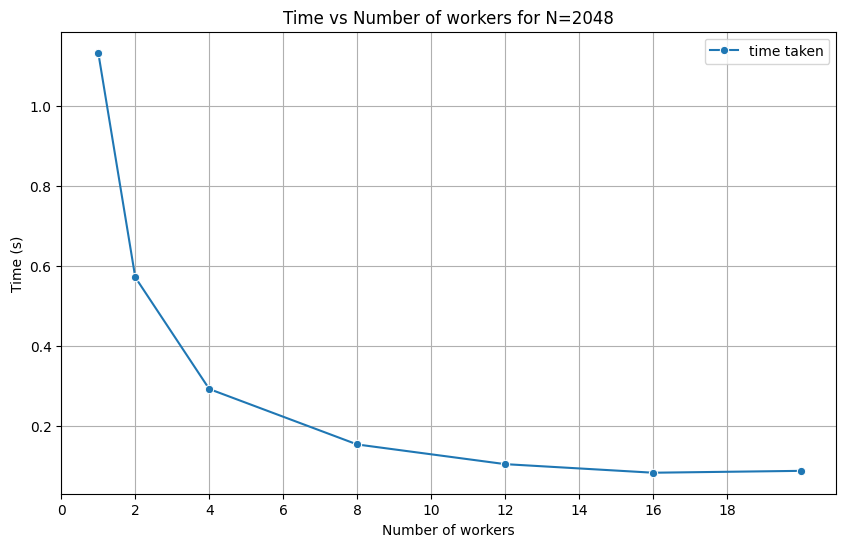

In [51]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df2048_grouped.index, y=df2048_grouped['time'], label = 'time taken', marker='o')
# add grid
plt.grid()
plt.xlabel('Number of workers')
plt.ylabel('Time (s)')
plt.xticks(np.arange(0, 20 , 2))
plt.title('Time vs Number of workers for N=2048')
plt.legend()

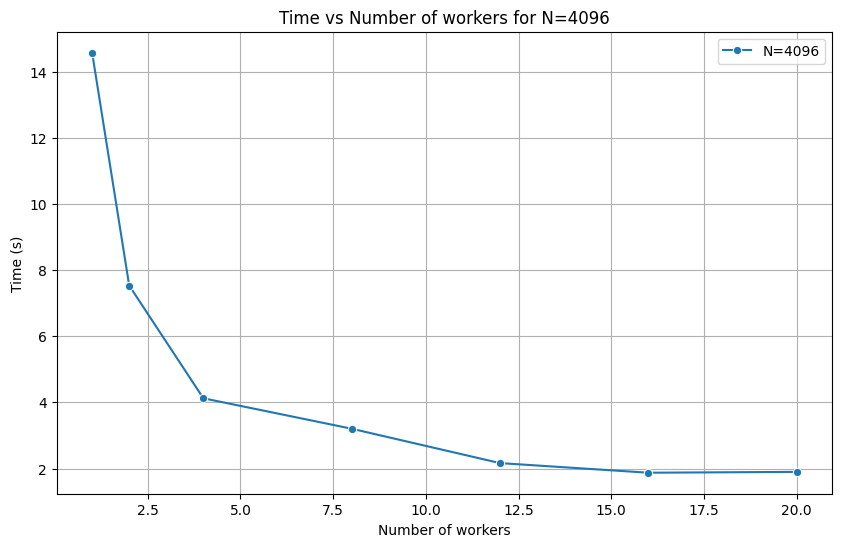

In [37]:
# same for N=4096
plt.figure(figsize=(10, 6))
sns.lineplot(x=df4096_grouped.index, y=df4096_grouped['time'], label='N=4096', marker='o')
# add grid
plt.grid()
plt.xlabel('Number of workers')
plt.ylabel('Time (s)')
plt.title('Time vs Number of workers for N=4096')
plt.legend()


In [38]:
# speedup
df2048_grouped['speedup'] = df2048_grouped['time'].iloc[0] / df2048_grouped['time']
df4096_grouped['speedup'] = df4096_grouped['time'].iloc[0] / df4096_grouped['time']

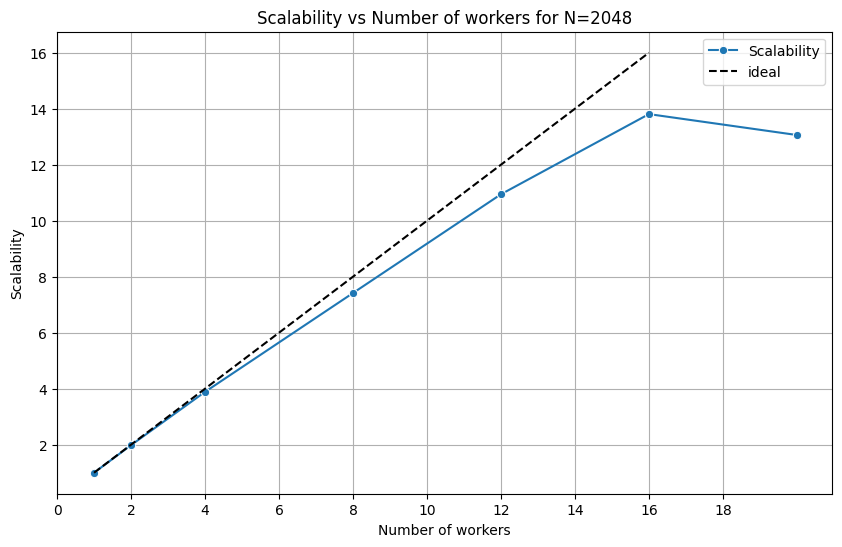

In [52]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df2048_grouped.index, y=df2048_grouped['speedup'], label='Scalability', marker='o')
sns.lineplot( x=np.arange(1, 17), y=np.arange(1, 17), label='ideal', linestyle='--', color='black')
plt.grid()
plt.xlabel('Number of workers')
plt.xticks(df2048_grouped.index)

plt.ylabel('Scalability')
plt.xticks(np.arange(0, 20 , 2))
plt.title('Scalability vs Number of workers for N=2048')
plt.legend()


Text(0.5, 1.0, 'Speedup vs Number of workers for N=4096')

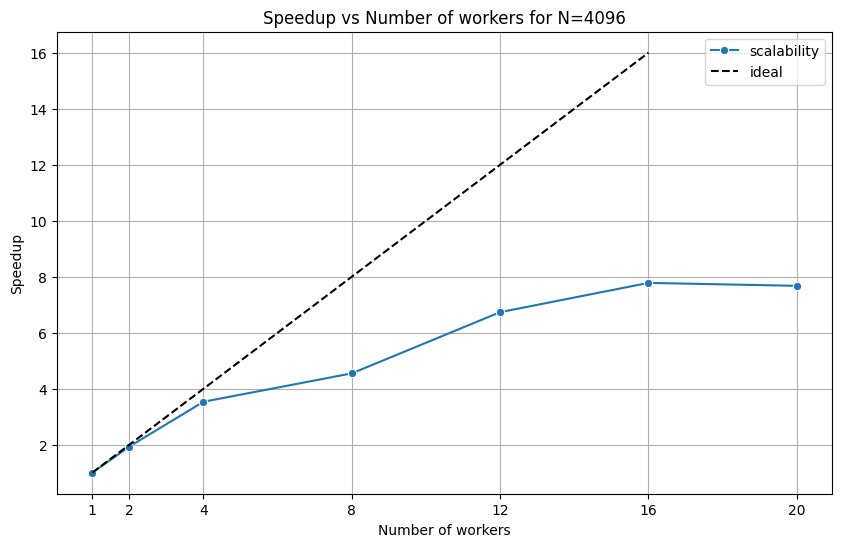

In [53]:

plt.figure(figsize=(10, 6))
sns.lineplot(x=df4096_grouped.index, y=df4096_grouped['speedup'], label='scalability', marker='o')
sns.lineplot( x=np.arange(1, 17), y=np.arange(1, 17), label='ideal', linestyle='--', color='black')
plt.grid()

plt.xticks(df4096_grouped.index)
plt.xlabel('Number of workers')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of workers for N=4096')

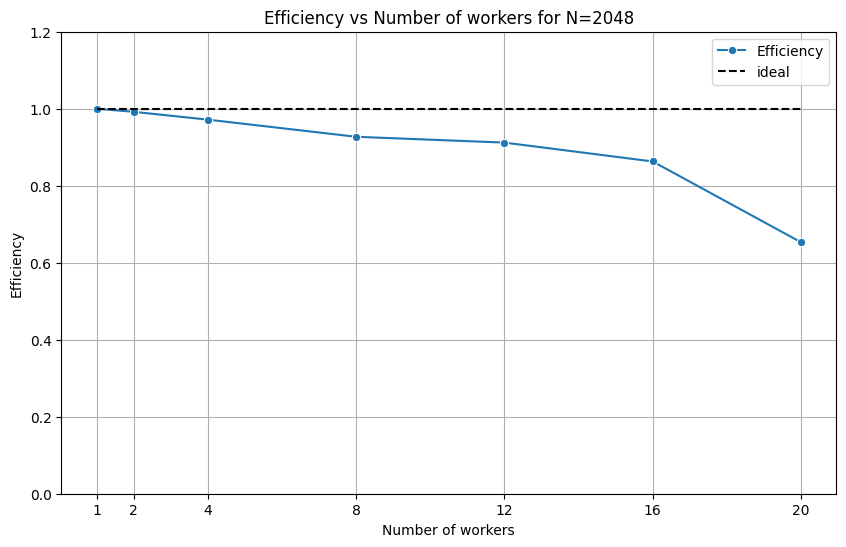

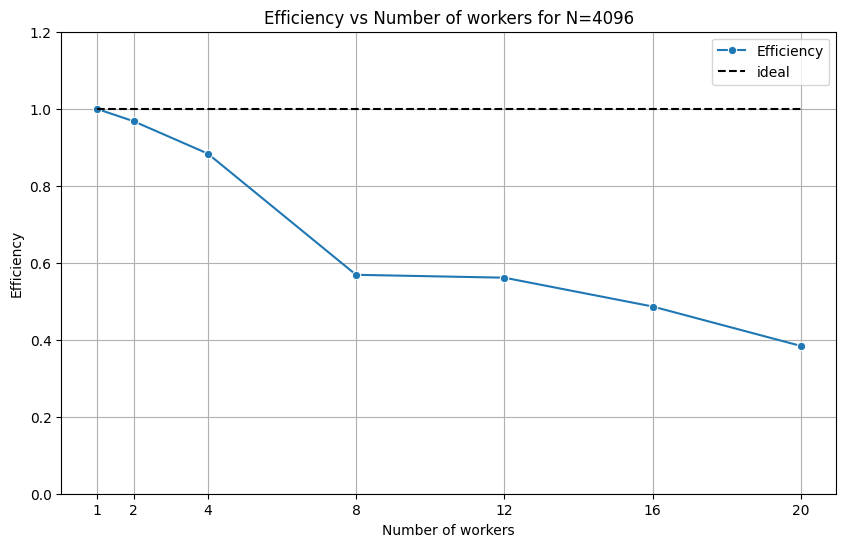

In [41]:
# efficiency
df2048_grouped['efficiency'] = df2048_grouped['speedup'] / df2048_grouped.index
df4096_grouped['efficiency'] = df4096_grouped['speedup'] / df4096_grouped.index

plt.figure(figsize=(10, 6))
sns.lineplot(x=df2048_grouped.index, y=df2048_grouped['efficiency'], label='Efficiency', marker='o')
sns.lineplot( x=np.arange(1, 21), y=np.ones(20), label='ideal', linestyle='--', color='black')
plt.grid()
plt.xlabel('Number of workers')
plt.xticks(df2048_grouped.index)
plt.ylabel('Efficiency')
# fix y range
plt.ylim(0, 1.2)

plt.title('Efficiency vs Number of workers for N=2048')
plt.legend()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df4096_grouped.index, y=df4096_grouped['efficiency'], label='Efficiency', marker='o')
sns.lineplot( x=np.arange(1, 21), y=np.ones(20), label='ideal', linestyle='--', color='black')
plt.grid()
plt.ylim(0, 1.2)
plt.xticks(df4096_grouped.index)
plt.xlabel('Number of workers')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of workers for N=4096')
plt.legend()

plt.show()


In [42]:
df2048_grouped.to_csv('strong_scaling_results2_grouped_2048.txt', sep=' ')

## 8192

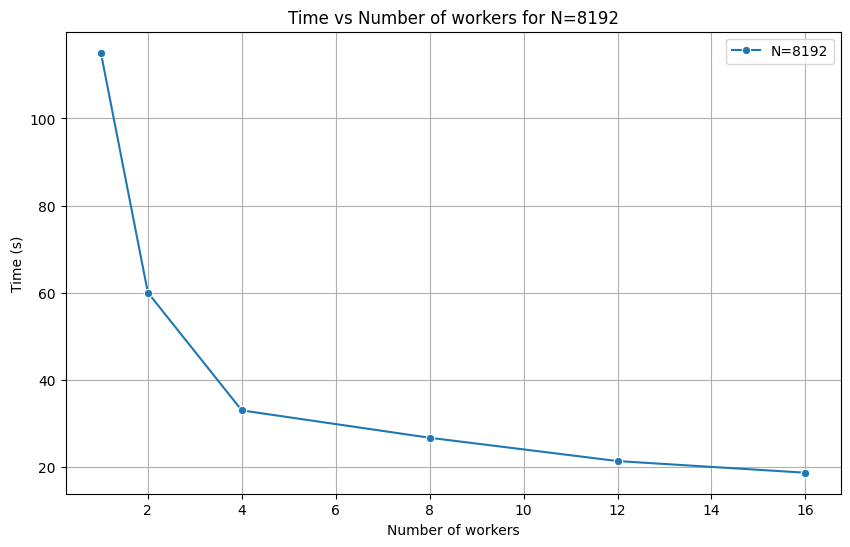

Text(0.5, 1.0, 'Efficiency vs Number of workers for N=8192')

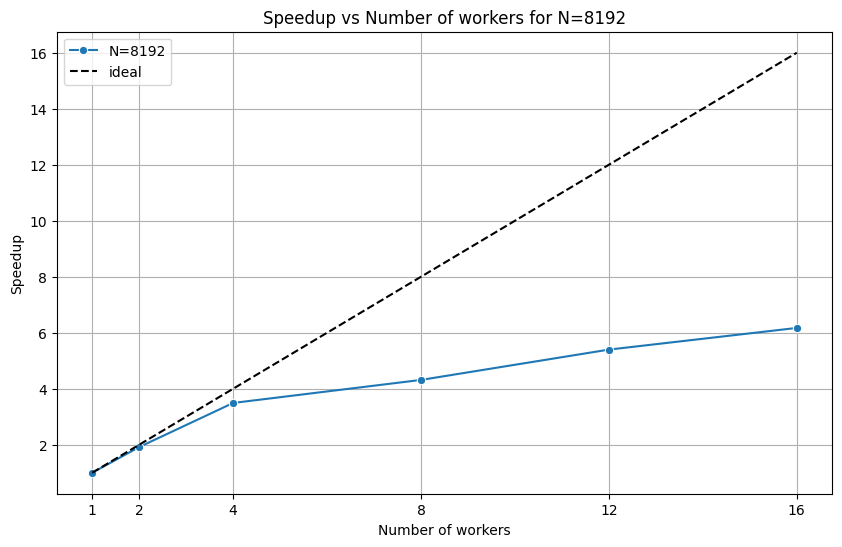

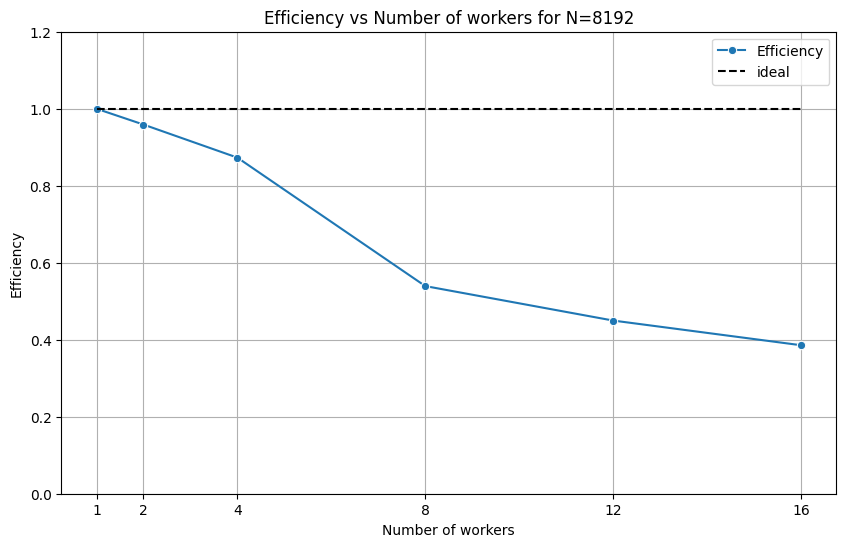

In [47]:
df8192_grouped = df8192.groupby('nworkers').mean()
df8192_grouped['speedup'] = df8192_grouped['time'].iloc[0] / df8192_grouped['time']
df8192_grouped['efficiency'] = df8192_grouped['speedup'] / df8192_grouped.index
df8192_grouped.to_csv('strong_scaling_results2_grouped_8192.txt', sep=' ')

plt.figure(figsize=(10, 6))
sns.lineplot(x=df8192_grouped.index, y=df8192_grouped['time'], label='N=8192', marker='o')
# add grid
plt.grid()
plt.xlabel('Number of workers')
plt.ylabel('Time (s)')
plt.title('Time vs Number of workers for N=8192')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df8192_grouped.index, y=df8192_grouped['speedup'], label='N=8192', marker='o')
sns.lineplot( x=np.arange(1, 17), y=np.arange(1, 17), label='ideal', linestyle='--', color='black')
plt.grid()

plt.xticks(df8192_grouped.index)
plt.xlabel('Number of workers')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of workers for N=8192')
plt.legend()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df8192_grouped.index, y=df8192_grouped['efficiency'], label='Efficiency', marker='o')
sns.lineplot( x=np.arange(1, 17), y=np.ones(16), label='ideal', linestyle='--', color='black')
plt.grid()
plt.ylim(0, 1.2)
plt.xticks(df8192_grouped.index)
plt.xlabel('Number of workers')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of workers for N=8192')

In [44]:
df4096_grouped.to_csv('strong_scaling_results2_grouped_4096.txt', sep=' ')

In [45]:
results_sequential = pd.read_csv('results_sequential.txt', sep=' ', header=None)
results_sequential.columns = ['N', 'time']
results_sequential.set_index('N', inplace=True)

results_sequential_grouped = results_sequential.groupby('N').mean()
results_sequential_grouped.to_csv('results_sequential_grouped.txt', sep=' ')

In [56]:
weak_scaling = pd.read_csv('weak_scaling_results.txt', sep=' ', header=None)
weak_scaling.head()

,0,1,2,3
0,2048,1.11310,1.29255,1
1,2580,2.70027,1.04460,2
2,3250,6.71388,1.20809,4
3,4095,14.23220,3.61798,8
4,4688,21.55360,4.79103,12


In [57]:
weak_scaling.columns = ['N', 'time_seq','time_par' ,'nworkers']

In [58]:
weak_scaling['speedup'] = weak_scaling['time_seq'] / weak_scaling['time_par']
weak_scaling['efficiency'] = weak_scaling['speedup'] / weak_scaling['nworkers']

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_14220\4271666331.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x600 with 0 Axes>

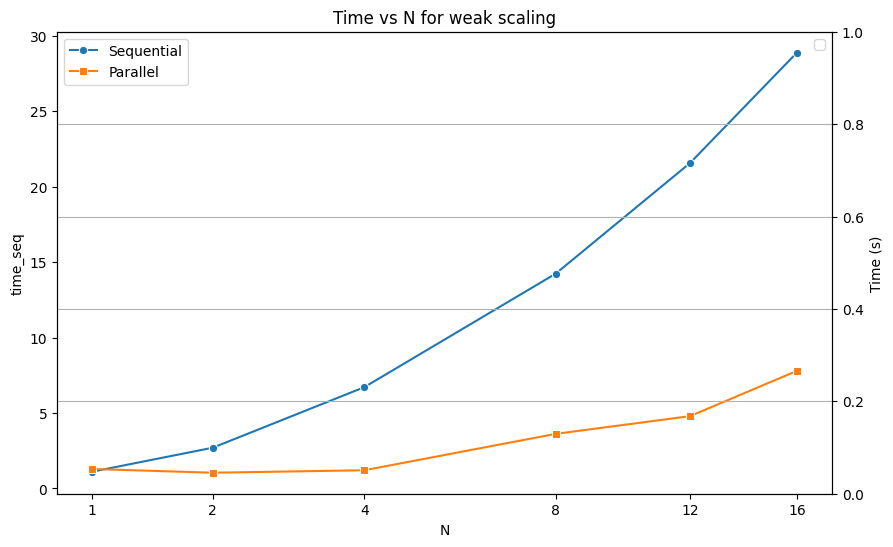

<Figure size 1000x600 with 0 Axes>

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# plot parallel and sequential time vs N
sns.lineplot(x=weak_scaling['N'], y=weak_scaling['time_seq'], label='Sequential', marker='o')  # square marker
sns.lineplot(x=weak_scaling['N'], y=weak_scaling['time_par'], label='Parallel', marker='s')

# Create a secondary x-axis
plt.xticks(weak_scaling['N'])
ax1 = plt.gca()
ax2 = ax1.twinx()

# Set the ticks and labels for the secondary x-axis to match the primary x-axis
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels(weak_scaling['nworkers'])
ax1.set_xlabel('N')
ax2.set_xlabel('Number of workers')

plt.grid()
plt.ylabel('Time (s)')
plt.title('Time vs N for weak scaling')
plt.legend()
plt.xticks(weak_scaling['N'])

plt.figure(figsize=(10, 6))

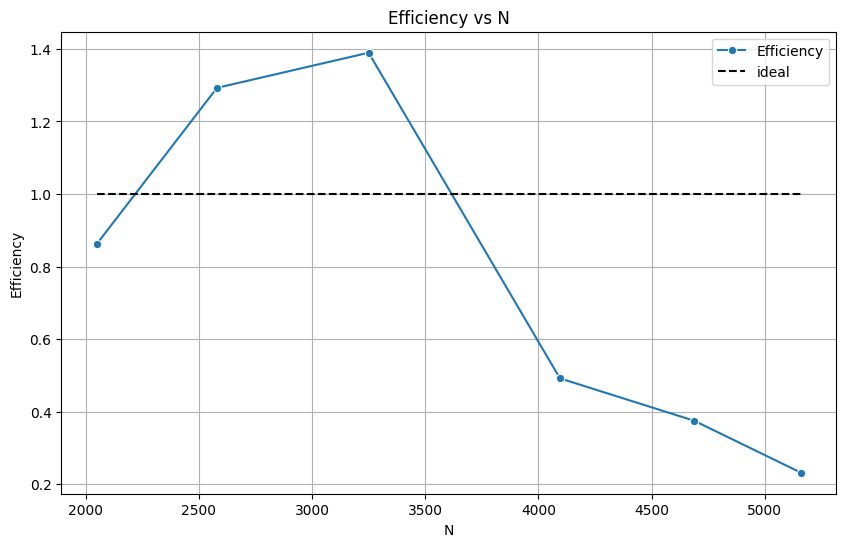

In [66]:
# efficiency
plt.figure(figsize=(10, 6))
sns.lineplot(x=weak_scaling['N'], y=weak_scaling['efficiency'], label='Efficiency', marker='o')
sns.lineplot( x=weak_scaling['N'], y=np.ones(weak_scaling.shape[0]), label='ideal', linestyle='--', color='black')
plt.grid()
plt.xlabel('N')
plt.ylabel('Efficiency')
plt.title('Efficiency vs N')
plt.legend()
plt.show()